# Develop LSTM Models for Time Series Forecasting
[ LSTM models for a range of standard time series forecasting problems.](https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/)

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import Dropout
from tensorflow.keras.regularizers import L2

### Load Data

In [2]:
df = pd.read_csv("POMO_dataset/Historical Weather Data 2010-2021_preprocessed_2.csv")
df.head()

,observation,date,month,year,tempC_7to8,tempC_1to2,tempC_6to7,tempC_avg(0C),Relative humidity_7to8,Relative humidity_1to2,...,soil_pH,water_pH,water_TDS_mgpl,Label (Disease Yes/No),Type of Disease (Bacterial Blight/Telya),Anthracnose,Fruit Spot/ Rot,Fusarium Wilt,Fruit Borer / Blight Blora,NewLabel
0,2010-01-01,1,1,2010,20,30,20,23,42,33,...,6.91,7.18,1709.0,0,0,0,0,0,0,0
1,2010-01-02,2,1,2010,23,29,23,25,49,40,...,6.77,7.66,1707.0,1,1,1,0,0,0,24
2,2010-01-03,3,1,2010,24,27,21,24,61,50,...,6.76,7.44,1707.0,0,0,0,0,0,0,0
3,2010-01-04,4,1,2010,23,29,20,24,57,30,...,7.10,7.43,1708.0,0,0,0,0,0,0,0
4,2010-01-05,5,1,2010,22,30,21,24,48,34,...,6.53,8.05,1709.0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4178 entries, 0 to 4177
Data columns (total 40 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   observation                               4178 non-null   object 
 1   date                                      4178 non-null   int64  
 2   month                                     4178 non-null   int64  
 3   year                                      4178 non-null   int64  
 4   tempC_7to8                                4178 non-null   int64  
 5   tempC_1to2                                4178 non-null   int64  
 6   tempC_6to7                                4178 non-null   int64  
 7   tempC_avg(0C)                             4178 non-null   int64  
 8   Relative humidity_7to8                    4178 non-null   int64  
 9   Relative humidity_1to2                    4178 non-null   int64  
 10  Relative humidity_6to7              

In [4]:
df.columns

Index(['observation', 'date', 'month', 'year', 'tempC_7to8', 'tempC_1to2',
       'tempC_6to7', 'tempC_avg(0C)', 'Relative humidity_7to8',
       'Relative humidity_1to2', 'Relative humidity_6to7',
       'Relative humidity_avg(%)', 'windspeedKmph_7to8', 'windspeedKmph_1to2',
       'windspeedKmph_6to7', 'windspeedKmph_avg(Km/h)', 'pressureMB_7to8',
       'pressureMB_1to2', 'pressureMB_6to7', 'pressureMB_avg', 'precipMM_7to8',
       'precipMM_1to2', 'precipMM_6to7', 'precipMM_avg(mm)',
       'weatherDesc_7to8', 'weatherDesc_1to2', 'weatherDesc_6to7',
       'weatherDesc', 'Sunshine Hours', '%_soil_moisure', 'soil_pH',
       'water_pH', 'water_TDS_mgpl', 'Label (Disease Yes/No)',
       'Type of Disease (Bacterial Blight/Telya)', 'Anthracnose',
       'Fruit Spot/ Rot', 'Fusarium Wilt', 'Fruit Borer / Blight Blora',
       'NewLabel'],
      dtype='object')

In [5]:
df1 = df[['observation', 'tempC_avg(0C)']]
df1 = df1.set_index('observation')
df1.index = pd.to_datetime(df1.index)
df1.sort_index(inplace=True)
df1.head()

,tempC_avg(0C)
observation,
2010-01-01,23
2010-01-02,25
2010-01-03,24
2010-01-04,24
2010-01-05,24


<AxesSubplot:xlabel='observation'>

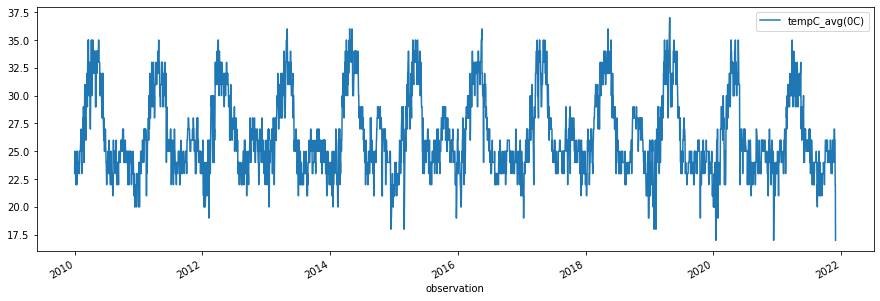

In [6]:
df1.plot(figsize=(15,5))

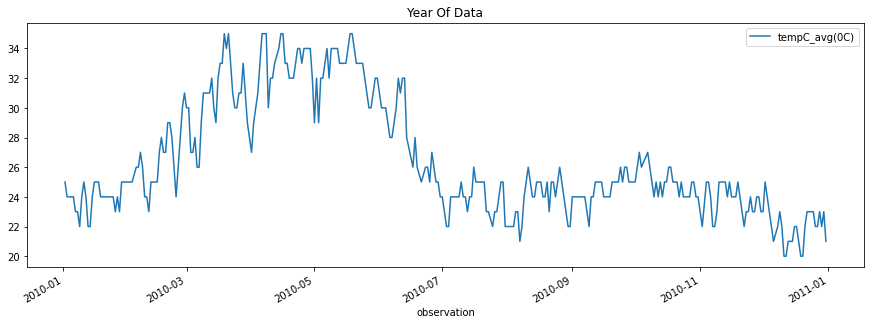

In [7]:
# How the one single week data looks like:
df1.loc[(df1.index > '01-01-2010') & (df1.index < '01-01-2011')].plot(figsize=(15, 5), title='Year Of Data')
plt.show()

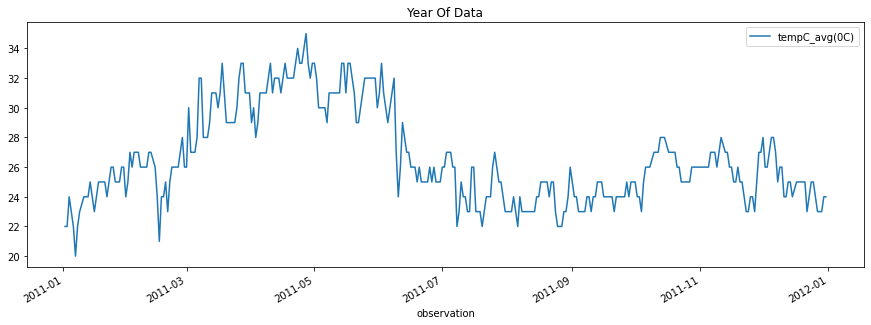

In [8]:
# How the one single week data looks like:
df1.loc[(df1.index > '01-01-2011') & (df1.index < '01-01-2012')].plot(figsize=(15, 5), title='Year Of Data')
plt.show()

In [9]:
df2 = df[['observation', 'Relative humidity_avg(%)']]
df2 = df2.set_index('observation')
df2.index = pd.to_datetime(df2.index)
df2.sort_index(inplace=True)
df2.head()

,Relative humidity_avg(%)
observation,
2010-01-01,44
2010-01-02,50
2010-01-03,63
2010-01-04,46
2010-01-05,45


<AxesSubplot:xlabel='observation'>

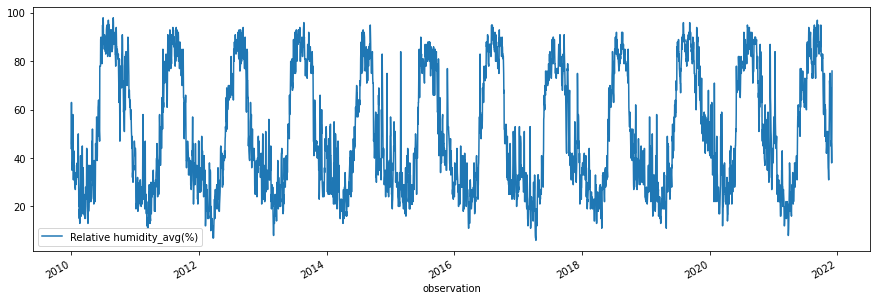

In [10]:
df2.plot(figsize=(15,5))

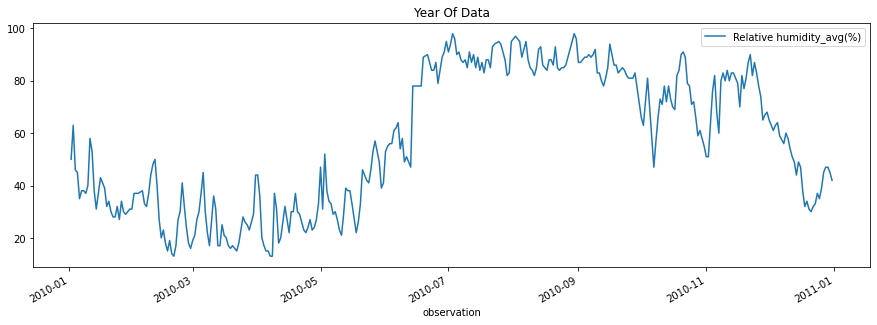

In [11]:
# How the one single week data looks like:
df2.loc[(df2.index > '01-01-2010') & (df2.index < '01-01-2011')].plot(figsize=(15, 5), title='Year Of Data')
plt.show()

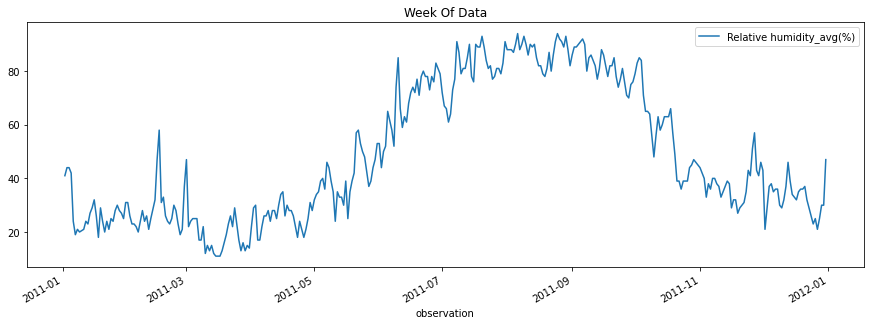

In [12]:
# How the one single week data looks like:
df2.loc[(df2.index > '01-01-2011') & (df2.index < '01-01-2012')].plot(figsize=(15, 5), title='Week Of Data')
plt.show()

### Data Preparation

In [13]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [14]:
# choose a number of time steps
n_steps = 30

# split into samples
X, y = split_sequence(df1['tempC_avg(0C)'], n_steps)

# summarize the data
for i in range(len(X)):
    print(X[i], y[i])
    
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

[23 25 24 24 24 24 23 23 22 24 25 24 22 22 24 25 25 25 24 24 24 24 24 24
 24 23 24 23 25 25] 25
[25 24 24 24 24 23 23 22 24 25 24 22 22 24 25 25 25 24 24 24 24 24 24 24
 23 24 23 25 25 25] 25
[24 24 24 24 23 23 22 24 25 24 22 22 24 25 25 25 24 24 24 24 24 24 24 23
 24 23 25 25 25 25] 25
[24 24 24 23 23 22 24 25 24 22 22 24 25 25 25 24 24 24 24 24 24 24 23 24
 23 25 25 25 25 25] 25
[24 24 23 23 22 24 25 24 22 22 24 25 25 25 24 24 24 24 24 24 24 23 24 23
 25 25 25 25 25 25] 26
[24 23 23 22 24 25 24 22 22 24 25 25 25 24 24 24 24 24 24 24 23 24 23 25
 25 25 25 25 25 26] 26
[23 23 22 24 25 24 22 22 24 25 25 25 24 24 24 24 24 24 24 23 24 23 25 25
 25 25 25 25 26 26] 27
[23 22 24 25 24 22 22 24 25 25 25 24 24 24 24 24 24 24 23 24 23 25 25 25
 25 25 25 26 26 27] 26
[22 24 25 24 22 22 24 25 25 25 24 24 24 24 24 24 24 23 24 23 25 25 25 25
 25 25 26 26 27 26] 24
[24 25 24 22 22 24 25 25 25 24 24 24 24 24 24 24 23 24 23 25 25 25 25 25
 25 26 26 27 26 24] 24
[25 24 22 22 24 25 25 25 24 24 24 24 24 

 26 27 27 27 28 28] 28
[25 24 24 24 24 24 23 24 24 24 24 24 25 24 25 25 25 24 24 23 25 26 26 26
 27 27 27 28 28 28] 27
[24 24 24 24 24 23 24 24 24 24 24 25 24 25 25 25 24 24 23 25 26 26 26 27
 27 27 28 28 28 27] 27
[24 24 24 24 23 24 24 24 24 24 25 24 25 25 25 24 24 23 25 26 26 26 27 27
 27 28 28 28 27 27] 27
[24 24 24 23 24 24 24 24 24 25 24 25 25 25 24 24 23 25 26 26 26 27 27 27
 28 28 28 27 27 27] 27
[24 24 23 24 24 24 24 24 25 24 25 25 25 24 24 23 25 26 26 26 27 27 27 28
 28 28 27 27 27 27] 26
[24 23 24 24 24 24 24 25 24 25 25 25 24 24 23 25 26 26 26 27 27 27 28 28
 28 27 27 27 27 26] 26
[23 24 24 24 24 24 25 24 25 25 25 24 24 23 25 26 26 26 27 27 27 28 28 28
 27 27 27 27 26 26] 25
[24 24 24 24 24 25 24 25 25 25 24 24 23 25 26 26 26 27 27 27 28 28 28 27
 27 27 27 26 26 25] 25
[24 24 24 24 25 24 25 25 25 24 24 23 25 26 26 26 27 27 27 28 28 28 27 27
 27 27 26 26 25 25] 25
[24 24 24 25 24 25 25 25 24 24 23 25 26 26 26 27 27 27 28 28 28 27 27 27
 27 26 26 25 25 25] 25
[24 24 25 24 25 2

[28 28 28 29 30 32 33 33 34 35 35 35 34 35 36 34 32 31 32 32 33 33 33 32
 31 31 31 31 31 32] 33
[28 28 29 30 32 33 33 34 35 35 35 34 35 36 34 32 31 32 32 33 33 33 32 31
 31 31 31 31 32 33] 33
[28 29 30 32 33 33 34 35 35 35 34 35 36 34 32 31 32 32 33 33 33 32 31 31
 31 31 31 32 33 33] 34
[29 30 32 33 33 34 35 35 35 34 35 36 34 32 31 32 32 33 33 33 32 31 31 31
 31 31 32 33 33 34] 32
[30 32 33 33 34 35 35 35 34 35 36 34 32 31 32 32 33 33 33 32 31 31 31 31
 31 32 33 33 34 32] 33
[32 33 33 34 35 35 35 34 35 36 34 32 31 32 32 33 33 33 32 31 31 31 31 31
 32 33 33 34 32 33] 32
[33 33 34 35 35 35 34 35 36 34 32 31 32 32 33 33 33 32 31 31 31 31 31 32
 33 33 34 32 33 32] 31
[33 34 35 35 35 34 35 36 34 32 31 32 32 33 33 33 32 31 31 31 31 31 32 33
 33 34 32 33 32 31] 30
[34 35 35 35 34 35 36 34 32 31 32 32 33 33 33 32 31 31 31 31 31 32 33 33
 34 32 33 32 31 30] 30
[35 35 35 34 35 36 34 32 31 32 32 33 33 33 32 31 31 31 31 31 32 33 33 34
 32 33 32 31 30 30] 30
[35 35 34 35 36 34 32 31 32 32 33 33 33 

 24 24 26 25 25 24] 24
[24 23 23 22 22 23 25 25 25 25 23 23 23 23 24 25 27 28 27 26 26 28 26 24
 24 26 25 25 24 24] 25
[23 23 22 22 23 25 25 25 25 23 23 23 23 24 25 27 28 27 26 26 28 26 24 24
 26 25 25 24 24 25] 23
[23 22 22 23 25 25 25 25 23 23 23 23 24 25 27 28 27 26 26 28 26 24 24 26
 25 25 24 24 25 23] 23
[22 22 23 25 25 25 25 23 23 23 23 24 25 27 28 27 26 26 28 26 24 24 26 25
 25 24 24 25 23 23] 24
[22 23 25 25 25 25 23 23 23 23 24 25 27 28 27 26 26 28 26 24 24 26 25 25
 24 24 25 23 23 24] 23
[23 25 25 25 25 23 23 23 23 24 25 27 28 27 26 26 28 26 24 24 26 25 25 24
 24 25 23 23 24 23] 21
[25 25 25 25 23 23 23 23 24 25 27 28 27 26 26 28 26 24 24 26 25 25 24 24
 25 23 23 24 23 21] 21
[25 25 25 23 23 23 23 24 25 27 28 27 26 26 28 26 24 24 26 25 25 24 24 25
 23 23 24 23 21 21] 23
[25 25 23 23 23 23 24 25 27 28 27 26 26 28 26 24 24 26 25 25 24 24 25 23
 23 24 23 21 21 23] 24
[25 23 23 23 23 24 25 27 28 27 26 26 28 26 24 24 26 25 25 24 24 25 23 23
 24 23 21 21 23 24] 24
[23 23 23 23 24 2

 30 31 31 31 31 30] 28
[33 33 34 35 35 35 36 32 32 31 31 30 30 30 31 27 24 30 29 31 31 30 32 30
 31 31 31 31 30 28] 29
[33 34 35 35 35 36 32 32 31 31 30 30 30 31 27 24 30 29 31 31 30 32 30 31
 31 31 31 30 28 29] 29
[34 35 35 35 36 32 32 31 31 30 30 30 31 27 24 30 29 31 31 30 32 30 31 31
 31 31 30 28 29 29] 28
[35 35 35 36 32 32 31 31 30 30 30 31 27 24 30 29 31 31 30 32 30 31 31 31
 31 30 28 29 29 28] 28
[35 35 36 32 32 31 31 30 30 30 31 27 24 30 29 31 31 30 32 30 31 31 31 31
 30 28 29 29 28 28] 27
[35 36 32 32 31 31 30 30 30 31 27 24 30 29 31 31 30 32 30 31 31 31 31 30
 28 29 29 28 28 27] 28
[36 32 32 31 31 30 30 30 31 27 24 30 29 31 31 30 32 30 31 31 31 31 30 28
 29 29 28 28 27 28] 27
[32 32 31 31 30 30 30 31 27 24 30 29 31 31 30 32 30 31 31 31 31 30 28 29
 29 28 28 27 28 27] 26
[32 31 31 30 30 30 31 27 24 30 29 31 31 30 32 30 31 31 31 31 30 28 29 29
 28 28 27 28 27 26] 26
[31 31 30 30 30 31 27 24 30 29 31 31 30 32 30 31 31 31 31 30 28 29 29 28
 28 27 28 27 26 26] 27
[31 30 30 30 31 2

[26 25 23 24 24 24 21 23 23 26 26 25 24 22 22 24 24 25 24 23 23 23 24 23
 23 25 23 23 24 23] 23
[25 23 24 24 24 21 23 23 26 26 25 24 22 22 24 24 25 24 23 23 23 24 23 23
 25 23 23 24 23 23] 25
[23 24 24 24 21 23 23 26 26 25 24 22 22 24 24 25 24 23 23 23 24 23 23 25
 23 23 24 23 23 25] 23
[24 24 24 21 23 23 26 26 25 24 22 22 24 24 25 24 23 23 23 24 23 23 25 23
 23 24 23 23 25 23] 22
[24 24 21 23 23 26 26 25 24 22 22 24 24 25 24 23 23 23 24 23 23 25 23 23
 24 23 23 25 23 22] 23
[24 21 23 23 26 26 25 24 22 22 24 24 25 24 23 23 23 24 23 23 25 23 23 24
 23 23 25 23 22 23] 23
[21 23 23 26 26 25 24 22 22 24 24 25 24 23 23 23 24 23 23 25 23 23 24 23
 23 25 23 22 23 23] 23
[23 23 26 26 25 24 22 22 24 24 25 24 23 23 23 24 23 23 25 23 23 24 23 23
 25 23 22 23 23 23] 23
[23 26 26 25 24 22 22 24 24 25 24 23 23 23 24 23 23 25 23 23 24 23 23 25
 23 22 23 23 23 23] 22
[26 26 25 24 22 22 24 24 25 24 23 23 23 24 23 23 25 23 23 24 23 23 25 23
 22 23 23 23 23 22] 21
[26 25 24 22 22 24 24 25 24 23 23 23 24 

 24 23 24 25 25 25] 25
[27 28 27 27 27 27 27 28 26 27 28 28 28 28 27 27 26 26 26 25 25 25 24 24
 23 24 25 25 25 25] 25
[28 27 27 27 27 27 28 26 27 28 28 28 28 27 27 26 26 26 25 25 25 24 24 23
 24 25 25 25 25 25] 25
[27 27 27 27 27 28 26 27 28 28 28 28 27 27 26 26 26 25 25 25 24 24 23 24
 25 25 25 25 25 25] 23
[27 27 27 27 28 26 27 28 28 28 28 27 27 26 26 26 25 25 25 24 24 23 24 25
 25 25 25 25 25 23] 23
[27 27 27 28 26 27 28 28 28 28 27 27 26 26 26 25 25 25 24 24 23 24 25 25
 25 25 25 25 23 23] 23
[27 27 28 26 27 28 28 28 28 27 27 26 26 26 25 25 25 24 24 23 24 25 25 25
 25 25 25 23 23 23] 22
[27 28 26 27 28 28 28 28 27 27 26 26 26 25 25 25 24 24 23 24 25 25 25 25
 25 25 23 23 23 22] 21
[28 26 27 28 28 28 28 27 27 26 26 26 25 25 25 24 24 23 24 25 25 25 25 25
 25 23 23 23 22 21] 21
[26 27 28 28 28 28 27 27 26 26 26 25 25 25 24 24 23 24 25 25 25 25 25 25
 23 23 23 22 21 21] 21
[27 28 28 28 28 27 27 26 26 26 25 25 25 24 24 23 24 25 25 25 25 25 25 23
 23 23 22 21 21 21] 21
[28 28 28 28 27 2

 26 26 26 26 27 27] 27
[31 31 31 31 31 27 22 25 26 26 26 26 27 27 27 27 27 26 25 26 26 23 26 26
 26 26 26 27 27 27] 26
[31 31 31 31 27 22 25 26 26 26 26 27 27 27 27 27 26 25 26 26 23 26 26 26
 26 26 27 27 27 26] 26
[31 31 31 27 22 25 26 26 26 26 27 27 27 27 27 26 25 26 26 23 26 26 26 26
 26 27 27 27 26 26] 25
[31 31 27 22 25 26 26 26 26 27 27 27 27 27 26 25 26 26 23 26 26 26 26 26
 27 27 27 26 26 25] 27
[31 27 22 25 26 26 26 26 27 27 27 27 27 26 25 26 26 23 26 26 26 26 26 27
 27 27 26 26 25 27] 25
[27 22 25 26 26 26 26 27 27 27 27 27 26 25 26 26 23 26 26 26 26 26 27 27
 27 26 26 25 27 25] 26
[22 25 26 26 26 26 27 27 27 27 27 26 25 26 26 23 26 26 26 26 26 27 27 27
 26 26 25 27 25 26] 25
[25 26 26 26 26 27 27 27 27 27 26 25 26 26 23 26 26 26 26 26 27 27 27 26
 26 25 27 25 26 25] 25
[26 26 26 26 27 27 27 27 27 26 25 26 26 23 26 26 26 26 26 27 27 27 26 26
 25 27 25 26 25 25] 25
[26 26 26 27 27 27 27 27 26 25 26 26 23 26 26 26 26 26 27 27 27 26 26 25
 27 25 26 25 25 25] 25
[26 26 27 27 27 2

### Vanilla LSTM
A Vanilla LSTM is an LSTM model that has a single hidden layer of LSTM units, and an output layer used to make a prediction.

In [ ]:
# Vanilla LSTM for univariate time series forecasting
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=200, verbose=1)

In [ ]:
# demonstrate prediction
x_input = np.array([31, 31, 32, 30, 29, 32, 33, 33, 35, 34, 
                    35, 33, 31, 30, 30, 31, 31, 33, 31, 29, 
                    28, 27, 29, 30, 31, 33, 35, 35, 35, 30])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=1)
print(yhat)

In [18]:
# choose a number of time steps
n_steps = 30 # 30 => 1 month
n_features = 1 

# split into samples
X, y = split_sequence(df1['tempC_avg(0C)'], n_steps)

# summarize the data
for i in range(len(X)):
    print(X[i], y[i])
    
# reshape from [samples, timesteps] into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], n_features))

# data_df = pd.DataFrame(X)
# data_df['next_day'] = y
# data_df.head()

[23 25 24 24 24 24 23 23 22 24 25 24 22 22 24 25 25 25 24 24 24 24 24 24
 24 23 24 23 25 25] 25
[25 24 24 24 24 23 23 22 24 25 24 22 22 24 25 25 25 24 24 24 24 24 24 24
 23 24 23 25 25 25] 25
[24 24 24 24 23 23 22 24 25 24 22 22 24 25 25 25 24 24 24 24 24 24 24 23
 24 23 25 25 25 25] 25
[24 24 24 23 23 22 24 25 24 22 22 24 25 25 25 24 24 24 24 24 24 24 23 24
 23 25 25 25 25 25] 25
[24 24 23 23 22 24 25 24 22 22 24 25 25 25 24 24 24 24 24 24 24 23 24 23
 25 25 25 25 25 25] 26
[24 23 23 22 24 25 24 22 22 24 25 25 25 24 24 24 24 24 24 24 23 24 23 25
 25 25 25 25 25 26] 26
[23 23 22 24 25 24 22 22 24 25 25 25 24 24 24 24 24 24 24 23 24 23 25 25
 25 25 25 25 26 26] 27
[23 22 24 25 24 22 22 24 25 25 25 24 24 24 24 24 24 24 23 24 23 25 25 25
 25 25 25 26 26 27] 26
[22 24 25 24 22 22 24 25 25 25 24 24 24 24 24 24 24 23 24 23 25 25 25 25
 25 25 26 26 27 26] 24
[24 25 24 22 22 24 25 25 25 24 24 24 24 24 24 24 23 24 23 25 25 25 25 25
 25 26 26 27 26 24] 24
[25 24 22 22 24 25 25 25 24 24 24 24 24 

 26 24 24 25 25 24] 25
[25 25 26 25 25 24 23 23 24 24 23 25 27 27 28 26 26 27 28 28 27 25 26 26
 24 24 25 25 24 25] 25
[25 26 25 25 24 23 23 24 24 23 25 27 27 28 26 26 27 28 28 27 25 26 26 24
 24 25 25 24 25 25] 25
[26 25 25 24 23 23 24 24 23 25 27 27 28 26 26 27 28 28 27 25 26 26 24 24
 25 25 24 25 25 25] 25
[25 25 24 23 23 24 24 23 25 27 27 28 26 26 27 28 28 27 25 26 26 24 24 25
 25 24 25 25 25 25] 25
[25 24 23 23 24 24 23 25 27 27 28 26 26 27 28 28 27 25 26 26 24 24 25 25
 24 25 25 25 25 25] 23
[24 23 23 24 24 23 25 27 27 28 26 26 27 28 28 27 25 26 26 24 24 25 25 24
 25 25 25 25 25 23] 24
[23 23 24 24 23 25 27 27 28 26 26 27 28 28 27 25 26 26 24 24 25 25 24 25
 25 25 25 25 23 24] 25
[23 24 24 23 25 27 27 28 26 26 27 28 28 27 25 26 26 24 24 25 25 24 25 25
 25 25 25 23 24 25] 25
[24 24 23 25 27 27 28 26 26 27 28 28 27 25 26 26 24 24 25 25 24 25 25 25
 25 25 23 24 25 25] 24
[24 23 25 27 27 28 26 26 27 28 28 27 25 26 26 24 24 25 25 24 25 25 25 25
 25 23 24 25 25 24] 23
[23 25 27 27 28 2

 33 32 29 28 28 28] 29
[31 30 30 30 32 31 29 28 28 30 32 32 29 28 30 32 30 31 32 32 31 33 34 33
 32 29 28 28 28 29] 30
[30 30 30 32 31 29 28 28 30 32 32 29 28 30 32 30 31 32 32 31 33 34 33 32
 29 28 28 28 29 30] 32
[30 30 32 31 29 28 28 30 32 32 29 28 30 32 30 31 32 32 31 33 34 33 32 29
 28 28 28 29 30 32] 33
[30 32 31 29 28 28 30 32 32 29 28 30 32 30 31 32 32 31 33 34 33 32 29 28
 28 28 29 30 32 33] 33
[32 31 29 28 28 30 32 32 29 28 30 32 30 31 32 32 31 33 34 33 32 29 28 28
 28 29 30 32 33 33] 34
[31 29 28 28 30 32 32 29 28 30 32 30 31 32 32 31 33 34 33 32 29 28 28 28
 29 30 32 33 33 34] 35
[29 28 28 30 32 32 29 28 30 32 30 31 32 32 31 33 34 33 32 29 28 28 28 29
 30 32 33 33 34 35] 35
[28 28 30 32 32 29 28 30 32 30 31 32 32 31 33 34 33 32 29 28 28 28 29 30
 32 33 33 34 35 35] 35
[28 30 32 32 29 28 30 32 30 31 32 32 31 33 34 33 32 29 28 28 28 29 30 32
 33 33 34 35 35 35] 34
[30 32 32 29 28 30 32 30 31 32 32 31 33 34 33 32 29 28 28 28 29 30 32 33
 33 34 35 35 35 34] 35
[32 32 29 28 30 3

 28 28 28 27 28 29] 29
[33 33 32 32 34 32 31 30 30 29 28 28 29 29 28 27 28 28 28 28 29 29 29 28
 28 28 27 28 29 29] 28
[33 32 32 34 32 31 30 30 29 28 28 29 29 28 27 28 28 28 28 29 29 29 28 28
 28 27 28 29 29 28] 27
[32 32 34 32 31 30 30 29 28 28 29 29 28 27 28 28 28 28 29 29 29 28 28 28
 27 28 29 29 28 27] 27
[32 34 32 31 30 30 29 28 28 29 29 28 27 28 28 28 28 29 29 29 28 28 28 27
 28 29 29 28 27 27] 28
[34 32 31 30 30 29 28 28 29 29 28 27 28 28 28 28 29 29 29 28 28 28 27 28
 29 29 28 27 27 28] 26
[32 31 30 30 29 28 28 29 29 28 27 28 28 28 28 29 29 29 28 28 28 27 28 29
 29 28 27 27 28 26] 27
[31 30 30 29 28 28 29 29 28 27 28 28 28 28 29 29 29 28 28 28 27 28 29 29
 28 27 27 28 26 27] 26
[30 30 29 28 28 29 29 28 27 28 28 28 28 29 29 29 28 28 28 27 28 29 29 28
 27 27 28 26 27 26] 25
[30 29 28 28 29 29 28 27 28 28 28 28 29 29 29 28 28 28 27 28 29 29 28 27
 27 28 26 27 26 25] 25
[29 28 28 29 29 28 27 28 28 28 28 29 29 29 28 28 28 27 28 29 29 28 27 27
 28 26 27 26 25 25] 26
[28 28 29 29 28 2

 26 25 26 25 26 26] 26
[25 27 28 28 27 27 27 26 26 26 27 27 27 27 26 25 24 25 25 25 25 24 24 26
 25 26 25 26 26 26] 26
[27 28 28 27 27 27 26 26 26 27 27 27 27 26 25 24 25 25 25 25 24 24 26 25
 26 25 26 26 26 26] 27
[28 28 27 27 27 26 26 26 27 27 27 27 26 25 24 25 25 25 25 24 24 26 25 26
 25 26 26 26 26 27] 25
[28 27 27 27 26 26 26 27 27 27 27 26 25 24 25 25 25 25 24 24 26 25 26 25
 26 26 26 26 27 25] 24
[27 27 27 26 26 26 27 27 27 27 26 25 24 25 25 25 25 24 24 26 25 26 25 26
 26 26 26 27 25 24] 24
[27 27 26 26 26 27 27 27 27 26 25 24 25 25 25 25 24 24 26 25 26 25 26 26
 26 26 27 25 24 24] 24
[27 26 26 26 27 27 27 27 26 25 24 25 25 25 25 24 24 26 25 26 25 26 26 26
 26 27 25 24 24 24] 24
[26 26 26 27 27 27 27 26 25 24 25 25 25 25 24 24 26 25 26 25 26 26 26 26
 27 25 24 24 24 24] 25
[26 26 27 27 27 27 26 25 24 25 25 25 25 24 24 26 25 26 25 26 26 26 26 27
 25 24 24 24 24 25] 24
[26 27 27 27 27 26 25 24 25 25 25 25 24 24 26 25 26 25 26 26 26 26 27 25
 24 24 24 24 25 24] 25
[27 27 27 27 26 2

 24 25 23 25 23 25] 24
[25 25 25 25 26 26 26 26 25 25 25 25 25 25 25 25 25 24 23 25 25 25 24 24
 25 23 25 23 25 24] 25
[25 25 25 26 26 26 26 25 25 25 25 25 25 25 25 25 24 23 25 25 25 24 24 25
 23 25 23 25 24 25] 25
[25 25 26 26 26 26 25 25 25 25 25 25 25 25 25 24 23 25 25 25 24 24 25 23
 25 23 25 24 25 25] 25
[25 26 26 26 26 25 25 25 25 25 25 25 25 25 24 23 25 25 25 24 24 25 23 25
 23 25 24 25 25 25] 25
[26 26 26 26 25 25 25 25 25 25 25 25 25 24 23 25 25 25 24 24 25 23 25 23
 25 24 25 25 25 25] 25
[26 26 26 25 25 25 25 25 25 25 25 25 24 23 25 25 25 24 24 25 23 25 23 25
 24 25 25 25 25 25] 26
[26 26 25 25 25 25 25 25 25 25 25 24 23 25 25 25 24 24 25 23 25 23 25 24
 25 25 25 25 25 26] 27
[26 25 25 25 25 25 25 25 25 25 24 23 25 25 25 24 24 25 23 25 23 25 24 25
 25 25 25 25 26 27] 27
[25 25 25 25 25 25 25 25 25 24 23 25 25 25 24 24 25 23 25 23 25 24 25 25
 25 25 25 26 27 27] 28
[25 25 25 25 25 25 25 25 24 23 25 25 25 24 24 25 23 25 23 25 24 25 25 25
 25 25 26 27 27 28] 29
[25 25 25 25 25 2

 29 28 28 28 29 28] 28
[34 33 33 33 34 34 33 33 32 32 31 32 33 32 32 34 33 31 31 30 29 29 28 29
 28 28 28 29 28 28] 28
[33 33 33 34 34 33 33 32 32 31 32 33 32 32 34 33 31 31 30 29 29 28 29 28
 28 28 29 28 28 28] 26
[33 33 34 34 33 33 32 32 31 32 33 32 32 34 33 31 31 30 29 29 28 29 28 28
 28 29 28 28 28 26] 28
[33 34 34 33 33 32 32 31 32 33 32 32 34 33 31 31 30 29 29 28 29 28 28 28
 29 28 28 28 26 28] 28
[34 34 33 33 32 32 31 32 33 32 32 34 33 31 31 30 29 29 28 29 28 28 28 29
 28 28 28 26 28 28] 28
[34 33 33 32 32 31 32 33 32 32 34 33 31 31 30 29 29 28 29 28 28 28 29 28
 28 28 26 28 28 28] 24
[33 33 32 32 31 32 33 32 32 34 33 31 31 30 29 29 28 29 28 28 28 29 28 28
 28 26 28 28 28 24] 24
[33 32 32 31 32 33 32 32 34 33 31 31 30 29 29 28 29 28 28 28 29 28 28 28
 26 28 28 28 24 24] 23
[32 32 31 32 33 32 32 34 33 31 31 30 29 29 28 29 28 28 28 29 28 28 28 26
 28 28 28 24 24 23] 24
[32 31 32 33 32 32 34 33 31 31 30 29 29 28 29 28 28 28 29 28 28 28 26 28
 28 28 24 24 23 24] 25
[31 32 33 32 32 3

 31 30 30 31 30 30] 31
[27 29 28 29 27 28 30 29 31 31 31 30 29 31 30 31 30 29 29 31 32 31 31 31
 30 30 31 30 30 31] 31
[29 28 29 27 28 30 29 31 31 31 30 29 31 30 31 30 29 29 31 32 31 31 31 30
 30 31 30 30 31 31] 33
[28 29 27 28 30 29 31 31 31 30 29 31 30 31 30 29 29 31 32 31 31 31 30 30
 31 30 30 31 31 33] 34
[29 27 28 30 29 31 31 31 30 29 31 30 31 30 29 29 31 32 31 31 31 30 30 31
 30 30 31 31 33 34] 35
[27 28 30 29 31 31 31 30 29 31 30 31 30 29 29 31 32 31 31 31 30 30 31 30
 30 31 31 33 34 35] 33
[28 30 29 31 31 31 30 29 31 30 31 30 29 29 31 32 31 31 31 30 30 31 30 30
 31 31 33 34 35 33] 31
[30 29 31 31 31 30 29 31 30 31 30 29 29 31 32 31 31 31 30 30 31 30 30 31
 31 33 34 35 33 31] 30
[29 31 31 31 30 29 31 30 31 30 29 29 31 32 31 31 31 30 30 31 30 30 31 31
 33 34 35 33 31 30] 30
[31 31 31 30 29 31 30 31 30 29 29 31 32 31 31 31 30 30 31 30 30 31 31 33
 34 35 33 31 30 30] 29
[31 31 30 29 31 30 31 30 29 29 31 32 31 31 31 30 30 31 30 30 31 31 33 34
 35 33 31 30 30 29] 30
[31 30 29 31 30 3

In [19]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=200, verbose=1)#%%

Epoch 1/200
130/130 [==============================] - 2s 10ms/step - loss: 173.3013
Epoch 2/200
130/130 [==============================] - 1s 11ms/step - loss: 3.7500
Epoch 3/200
130/130 [==============================] - 1s 10ms/step - loss: 3.4071
Epoch 4/200
130/130 [==============================] - 1s 10ms/step - loss: 2.3094
Epoch 5/200
130/130 [==============================] - 1s 10ms/step - loss: 2.6662
Epoch 6/200
130/130 [==============================] - 1s 10ms/step - loss: 2.2477
Epoch 7/200
130/130 [==============================] - 1s 10ms/step - loss: 2.2201
Epoch 8/200
130/130 [==============================] - 1s 10ms/step - loss: 2.0751
Epoch 9/200
130/130 [==============================] - 1s 10ms/step - loss: 1.8270
Epoch 10/200
130/130 [==============================] - 1s 10ms/step - loss: 1.9059
Epoch 11/200
130/130 [==============================] - 1s 10ms/step - loss: 1.8066
Epoch 12/200
130/130 [==============================] - 1s 10ms/step - loss: 1.8987

130/130 [==============================] - 1s 11ms/step - loss: 8.1306
Epoch 194/200
130/130 [==============================] - 1s 11ms/step - loss: 8.0056
Epoch 195/200
130/130 [==============================] - 1s 11ms/step - loss: 7.9525
Epoch 196/200
130/130 [==============================] - 1s 11ms/step - loss: 8.0020
Epoch 197/200
130/130 [==============================] - 2s 12ms/step - loss: 7.7865
Epoch 198/200
130/130 [==============================] - 1s 11ms/step - loss: 7.8039
Epoch 199/200
130/130 [==============================] - 1s 11ms/step - loss: 7.9598
Epoch 200/200
130/130 [==============================] - 1s 11ms/step - loss: 8.4611


In [22]:
# demonstrate prediction
x_input = np.array([28,30,31,30,30,27,27,28,26,26,29,31,31,
                    31,32,30,29,32,33,33,35,34,35,33,31,30,
                    30,31,31,33])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input)
print(yhat)

[[29.125044]]


In [20]:
# """28 30 31 30 30 27 27 28 26 26 29 31 31 31 32 30 29 32 33 33 35 34 35 33 31 30 30 31 31 33""".replace(' ', ',')# load data

'28,30,31,30,30,27,27,28,26,26,29,31,31,31,32,30,29,32,33,33,35,34,35,33,31,30,30,31,31,33'

### Stacked LSTM
Multiple hidden LSTM layers can be stacked one on top of another in what is referred to as a Stacked LSTM model.

In [23]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
130/130 [==============================] - 4s 19ms/step - loss: 10445.9878
Epoch 2/200
130/130 [==============================] - 2s 19ms/step - loss: 21.9459
Epoch 3/200
130/130 [==============================] - 2s 19ms/step - loss: 13.8359
Epoch 4/200
130/130 [==============================] - 2s 19ms/step - loss: 7.0024
Epoch 5/200
130/130 [==============================] - 3s 19ms/step - loss: 5.4290
Epoch 6/200
130/130 [==============================] - 2s 19ms/step - loss: 5.5914
Epoch 7/200
130/130 [==============================] - 2s 19ms/step - loss: 7.6612
Epoch 8/200
130/130 [==============================] - 3s 20ms/step - loss: 5.2698
Epoch 9/200
130/130 [==============================] - 3s 20ms/step - loss: 4.7128
Epoch 10/200
130/130 [==============================] - 3s 19ms/step - loss: 4.8298
Epoch 11/200
130/130 [==============================] - 3s 20ms/step - loss: 4.2998
Epoch 12/200
130/130 [==============================] - 3s 20ms/step - loss: 4.

Epoch 194/200
130/130 [==============================] - 3s 21ms/step - loss: 9.8615
Epoch 195/200
130/130 [==============================] - 3s 21ms/step - loss: 10.4960
Epoch 196/200
130/130 [==============================] - 3s 21ms/step - loss: 8.3535
Epoch 197/200
130/130 [==============================] - 3s 21ms/step - loss: 7.9768
Epoch 198/200
130/130 [==============================] - 3s 20ms/step - loss: 9.1326
Epoch 199/200
130/130 [==============================] - 3s 21ms/step - loss: 8.3554
Epoch 200/200
130/130 [==============================] - 3s 21ms/step - loss: 8.9050


In [24]:
# demonstrate prediction
x_input = np.array([28,30,31,30,30,27,27,28,26,26,29,31,31,
                    31,32,30,29,32,33,33,35,34,35,33,31,30,
                    30,31,31,33])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input)
print(yhat)

[[28.558191]]


### Predicting For the next 10 data

In [27]:
# demonstrate prediction for next 10 days
x_input = np.array([28,30,31,30,30,27,27,28,26,26,29,31,31,
                    31,32,30,29,32,33,33,35,34,35,33,31,30,
                    30,31,31,33])
temp_input = list(x_input)
lst_output = []
i = 0
while(i<10):
    
    if(len(temp_input)>n_steps):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i = i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i = i+1
    

print(lst_output)

[28.558191]
1 day input [30.        31.        30.        30.        27.        27.
 28.        26.        26.        29.        31.        31.
 31.        32.        30.        29.        32.        33.
 33.        35.        34.        35.        33.        31.
 30.        30.        31.        31.        33.        28.5581913]
1 day output [[28.278301]]
2 day input [31.         30.         30.         27.         27.         28.
 26.         26.         29.         31.         31.         31.
 32.         30.         29.         32.         33.         33.
 35.         34.         35.         33.         31.         30.
 30.         31.         31.         33.         28.5581913  28.27830124]
2 day output [[27.986803]]
3 day input [30.         30.         27.         27.         28.         26.
 26.         29.         31.         31.         31.         32.
 30.         29.         32.         33.         33.         35.
 34.         35.         33.         31.         30.         

### Bidirectional LSTM
On some sequence prediction problems, it can be beneficial to allow the LSTM model to learn the input sequence both forward and backwards and concatenate both interpretations.

In [30]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
130/130 [==============================] - 21s 16ms/step - loss: 17.9584
Epoch 2/200
130/130 [==============================] - 2s 18ms/step - loss: 3.3089
Epoch 3/200
130/130 [==============================] - 2s 13ms/step - loss: 2.9276
Epoch 4/200
130/130 [==============================] - 2s 13ms/step - loss: 2.2571
Epoch 5/200
130/130 [==============================] - 2s 13ms/step - loss: 1.8175
Epoch 6/200
130/130 [==============================] - 2s 13ms/step - loss: 1.6561
Epoch 7/200
130/130 [==============================] - 2s 13ms/step - loss: 1.6020
Epoch 8/200
130/130 [==============================] - 2s 13ms/step - loss: 1.6372
Epoch 9/200
130/130 [==============================] - 2s 14ms/step - loss: 1.6140
Epoch 10/200
130/130 [==============================] - 2s 13ms/step - loss: 1.6731
Epoch 11/200
130/130 [==============================] - 2s 14ms/step - loss: 1.5736
Epoch 12/200
130/130 [==============================] - 2s 15ms/step - loss: 1.5785

130/130 [==============================] - 2s 13ms/step - loss: 1.5040
Epoch 195/200
130/130 [==============================] - 2s 13ms/step - loss: 1.4238
Epoch 196/200
130/130 [==============================] - 2s 12ms/step - loss: 1.3534
Epoch 197/200
130/130 [==============================] - 2s 12ms/step - loss: 1.3582
Epoch 198/200
130/130 [==============================] - 2s 13ms/step - loss: 1.3700
Epoch 199/200
130/130 [==============================] - 2s 12ms/step - loss: 1.3403
Epoch 200/200
130/130 [==============================] - 2s 12ms/step - loss: 1.3383


In [ ]:
# demonstrate prediction
x_input = np.array([28,30,31,30,30,27,27,28,26,26,29,31,31,
                    31,32,30,29,32,33,33,35,34,35,33,31,30,
                    30,31,31,33])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

### Multivariate LSTM Models
1. Multiple Input Series.
2. Multiple Parallel Series.

### Functions

In [194]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    '''
    To split Time Series data into Multiple Parallel Series data.
    
    Input : split_sequences(dataset, number_of_time_steps)
    - dataset 
    - number_of_time_steps : ex. 30 for 30 days. 
    '''
    try:
        import numpy as np
    except Exception as e:
        print(f"Exception [split_sequences] : {e} ")    
    X, y = [], []
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# split_sequences(dataset, number_of_time_steps)

In [236]:
# evaluate a regression model
def evaluate_regression_model(y, yhat):
    '''
    To evaluate regression model by using Mean Squared Error, 
    Root Mean Squared Error, Mean Absolute Error and R^2 Score.
    '''
    try:
        import math
        from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    except Exception as e:
        print(f"Exception [evaluate_regression_model] : {e} ")    
    Mean_Squared_Error = round(mean_squared_error(y, yhat), 2)
    Root_Mean_Squared_Error = round(math.sqrt(mean_squared_error(y, yhat)), 2)
    Mean_Absolute_Error = round(mean_absolute_error(y, yhat), 2)
    R2Score = round(r2_score(y, yhat), 2)
    print(f"Mean Squared Error : {Mean_Squared_Error} ")
    print(f"Root Mean Squared Error : {Root_Mean_Squared_Error} ")
    print(f"Mean Absolute Error : {Mean_Absolute_Error} ")
    print(f"R^2 Score : {R2Score} ")
    return {"Mean_Squared_Error" : Mean_Squared_Error, 
            "Root_Mean_Squared_Error" : Root_Mean_Squared_Error, 
            "Mean_Absolute_Error" : Mean_Absolute_Error, 
            "R2Score" : R2Score}

# evaluate_regression_model(y, yhat)

### Multiple Parallel Series

In [189]:
df

,observation,date,month,year,tempC_7to8,tempC_1to2,tempC_6to7,tempC_avg(0C),Relative humidity_7to8,Relative humidity_1to2,...,soil_pH,water_pH,water_TDS_mgpl,Label (Disease Yes/No),Type of Disease (Bacterial Blight/Telya),Anthracnose,Fruit Spot/ Rot,Fusarium Wilt,Fruit Borer / Blight Blora,NewLabel
0,2010-01-01,1,1,2010,20,30,20,23,42,33,...,6.91,7.18,1709.0,0,0,0,0,0,0,0
1,2010-01-02,2,1,2010,23,29,23,25,49,40,...,6.77,7.66,1707.0,1,1,1,0,0,0,24
2,2010-01-03,3,1,2010,24,27,21,24,61,50,...,6.76,7.44,1707.0,0,0,0,0,0,0,0
3,2010-01-04,4,1,2010,23,29,20,24,57,30,...,7.10,7.43,1708.0,0,0,0,0,0,0,0
4,2010-01-05,5,1,2010,22,30,21,24,48,34,...,6.53,8.05,1709.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4173,2021-11-27,27,11,2021,21,32,27,26,56,35,...,7.17,7.69,1707.0,1,1,0,0,0,0,16
4174,2021-11-28,28,11,2021,21,31,26,26,58,32,...,7.46,8.22,1709.0,1,1,0,0,0,0,16
4175,2021-11-29,29,11,2021,17,26,24,22,49,29,...,7.38,7.92,1709.0,0,0,0,0,0,0,0
4176,2021-11-30,30,11,2021,17,27,22,22,52,41,...,7.01,7.16,1630.2,0,0,0,0,0,0,0


In [190]:
df.columns

Index(['observation', 'date', 'month', 'year', 'tempC_7to8', 'tempC_1to2',
       'tempC_6to7', 'tempC_avg(0C)', 'Relative humidity_7to8',
       'Relative humidity_1to2', 'Relative humidity_6to7',
       'Relative humidity_avg(%)', 'windspeedKmph_7to8', 'windspeedKmph_1to2',
       'windspeedKmph_6to7', 'windspeedKmph_avg(Km/h)', 'pressureMB_7to8',
       'pressureMB_1to2', 'pressureMB_6to7', 'pressureMB_avg', 'precipMM_7to8',
       'precipMM_1to2', 'precipMM_6to7', 'precipMM_avg(mm)',
       'weatherDesc_7to8', 'weatherDesc_1to2', 'weatherDesc_6to7',
       'weatherDesc', 'Sunshine Hours', '%_soil_moisure', 'soil_pH',
       'water_pH', 'water_TDS_mgpl', 'Label (Disease Yes/No)',
       'Type of Disease (Bacterial Blight/Telya)', 'Anthracnose',
       'Fruit Spot/ Rot', 'Fusarium Wilt', 'Fruit Borer / Blight Blora',
       'NewLabel'],
      dtype='object')

In [191]:
df1 = df[['observation', 'tempC_avg(0C)', 'Relative humidity_avg(%)', 'windspeedKmph_avg(Km/h)', 
          'pressureMB_avg', 'precipMM_avg(mm)', 'weatherDesc', 'Sunshine Hours', '%_soil_moisure']] 
df1 = df1.set_index('observation')
df1.index = pd.to_datetime(df1.index)
df1.sort_index(inplace=True)
df1.head()

,tempC_avg(0C),Relative humidity_avg(%),windspeedKmph_avg(Km/h),pressureMB_avg,precipMM_avg(mm),weatherDesc,Sunshine Hours,%_soil_moisure
observation,,,,,,,,
2010-01-01,23,44,5,1013,0.0,5,9.8,45
2010-01-02,25,50,5,1014,0.0,4,9.8,45
2010-01-03,24,63,6,1015,0.0,4,9.8,41
2010-01-04,24,46,6,1013,0.0,5,9.8,43
2010-01-05,24,45,4,1011,0.0,5,9.8,44


1 tempC_avg(0C)


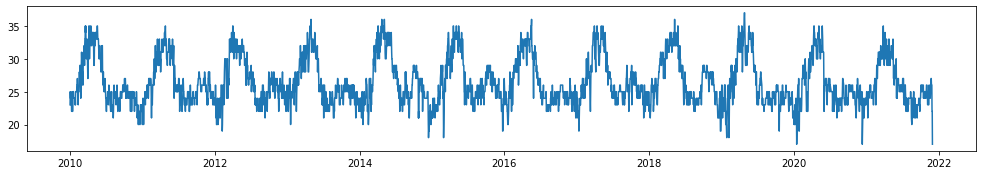

2 Relative humidity_avg(%)


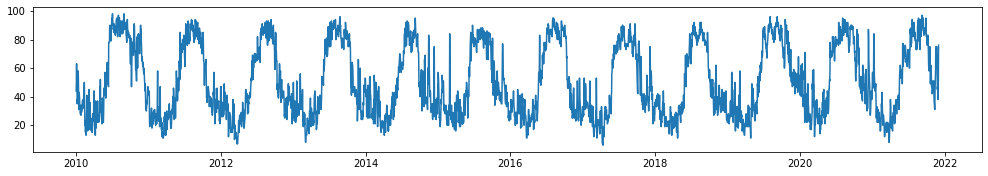

3 windspeedKmph_avg(Km/h)


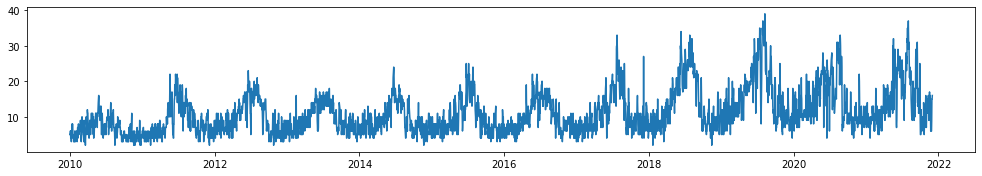

4 pressureMB_avg


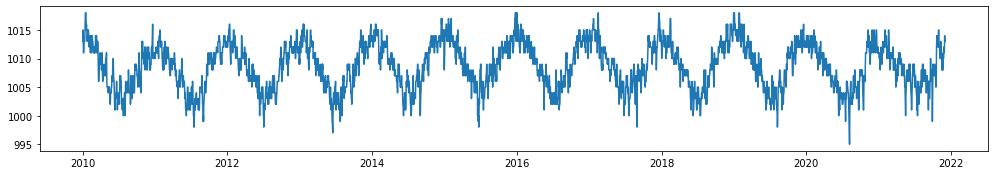

5 precipMM_avg(mm)


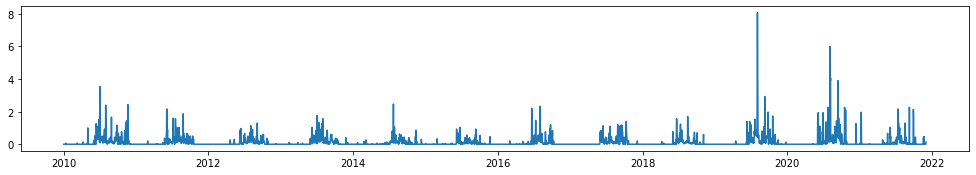

6 weatherDesc


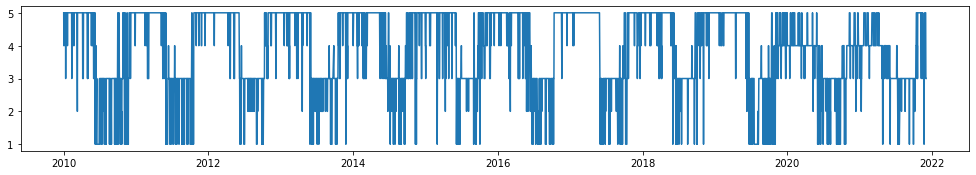

7 Sunshine Hours


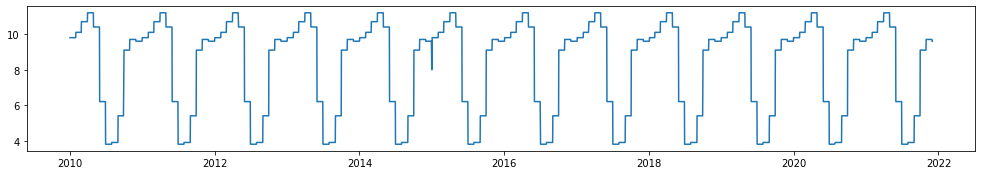

8 %_soil_moisure


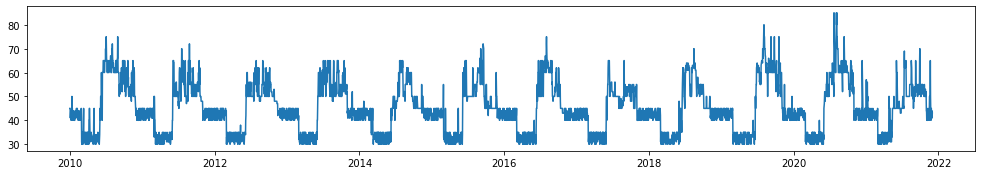

In [193]:
for i in range(len(df1.columns)):
    print(i+1, df1.columns[i])
    plt.figure(figsize=(17,25))
    plt.subplot(len(df1.columns), 1, i+1)
    plt.plot(df1[df1.columns[i]]) # , linestyle = 'dotted'
    plt.show()


In [196]:
# horizontally stack columns
dataset = np.array([list(df1.iloc[[i]].values[0]) for i in range(len(df1))])

# choose a number of time steps
n_steps = 30

# convert into input/output
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)

# # summarize the data
# for i in range(len(X)):
#     print(X[i], y[i])

(4148, 30, 8) (4148, 8)


In [201]:
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', 
               return_sequences=True, 
#                kernel_regularizer=L2(0.01), 
#                recurrent_regularizer=L2(0.01), 
#                bias_regularizer=L2(0.01), 
               input_shape=(X.shape[1], n_features)))
model.add(Dropout(0.2))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')

# fit model
history = model.fit(X, y, epochs=400, verbose=1)

# https://stackoverflow.com/questions/61931629/overfitting-in-lstm-even-after-using-regularizers




Epoch 1/400
130/130 [==============================] - 21s 60ms/step - loss: 790776.7156
Epoch 2/400
130/130 [==============================] - 7s 56ms/step - loss: 268228.8024
Epoch 3/400
130/130 [==============================] - 7s 56ms/step - loss: 63074.7265
Epoch 4/400
130/130 [==============================] - 7s 56ms/step - loss: 24438.0793
Epoch 5/400
130/130 [==============================] - 7s 57ms/step - loss: 20733.6896
Epoch 6/400
130/130 [==============================] - 7s 56ms/step - loss: 8991.0846
Epoch 7/400
130/130 [==============================] - 7s 57ms/step - loss: 5765.6446
Epoch 8/400
130/130 [==============================] - 6s 47ms/step - loss: 4824.0063
Epoch 9/400
130/130 [==============================] - 7s 54ms/step - loss: 3808.8336
Epoch 10/400
130/130 [==============================] - 7s 56ms/step - loss: 2995.0468
Epoch 11/400
130/130 [==============================] - 7s 55ms/step - loss: 2543.8865
Epoch 12/400
130/130 [======================

130/130 [==============================] - 5s 37ms/step - loss: 36.0085
Epoch 191/400
130/130 [==============================] - 5s 38ms/step - loss: 37.6719
Epoch 192/400
130/130 [==============================] - 5s 38ms/step - loss: 40.4845
Epoch 193/400
130/130 [==============================] - 5s 37ms/step - loss: 34.9542
Epoch 194/400
130/130 [==============================] - 5s 37ms/step - loss: 36.8127
Epoch 195/400
130/130 [==============================] - 5s 37ms/step - loss: 35.3575
Epoch 196/400
130/130 [==============================] - 5s 37ms/step - loss: 36.9890
Epoch 197/400
130/130 [==============================] - 5s 38ms/step - loss: 34.8816
Epoch 198/400
130/130 [==============================] - 6s 44ms/step - loss: 36.0882
Epoch 199/400
130/130 [==============================] - 5s 38ms/step - loss: 34.8871
Epoch 200/400
130/130 [==============================] - 5s 37ms/step - loss: 33.9543
Epoch 201/400
130/130 [==============================] - 5s 38ms/ste

130/130 [==============================] - 5s 39ms/step - loss: 14.7020
Epoch 381/400
130/130 [==============================] - 5s 39ms/step - loss: 13.5945
Epoch 382/400
130/130 [==============================] - 5s 38ms/step - loss: 12.4146
Epoch 383/400
130/130 [==============================] - 5s 38ms/step - loss: 13.8559
Epoch 384/400
130/130 [==============================] - 5s 38ms/step - loss: 14.0267
Epoch 385/400
130/130 [==============================] - 5s 38ms/step - loss: 12.9340
Epoch 386/400
130/130 [==============================] - 5s 38ms/step - loss: 14.8818
Epoch 387/400
130/130 [==============================] - 5s 38ms/step - loss: 12.7890
Epoch 388/400
130/130 [==============================] - 5s 38ms/step - loss: 13.3890
Epoch 389/400
130/130 [==============================] - 5s 38ms/step - loss: 13.5702
Epoch 390/400
130/130 [==============================] - 5s 39ms/step - loss: 13.4868
Epoch 391/400
130/130 [==============================] - 5s 40ms/ste

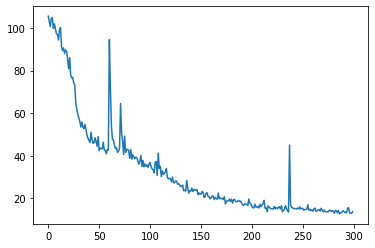

In [205]:
loss_per_epoch = model.history.history['loss']# Save the model
loss_per_epoch = loss_per_epoch[100:]
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [206]:
# demonstrate prediction
x_input = X[0]
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input)
print(yhat)

[[2.1925003e+01 2.3496357e+01 6.7811170e+00 8.1351477e+02 1.1822727e-01
  4.4213037e+00 7.4896684e+00 3.4088886e+01]]


In [207]:
y[0]

array([  25. ,   31. ,    5. , 1014. ,    0. ,    5. ,   10.1,   41. ])

In [208]:
list(yhat[0])

[21.925003,
 23.496357,
 6.781117,
 813.5148,
 0.11822727,
 4.4213037,
 7.4896684,
 34.088886]

In [209]:
# X[0]

In [210]:
# x_val = X[0].tolist()
# x_val.pop(0)
# x_val.append(yhat[0].tolist())
# x_val

In [211]:
# print(x_val, len(x_val))

In [212]:
# demonstrate prediction
x_input = X
# x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input)
print(yhat)

[[21.925007  23.496359   6.7811227 ...  4.4213037  7.489669  34.088886 ]
 [22.031044  22.371805   6.9500833 ...  4.453162   7.4508553 34.019478 ]
 [21.768034  27.909828   6.8716607 ...  4.3190556  7.5637875 33.96053  ]
 ...
 [20.604424  32.26306    9.244516  ...  4.098846   6.2411504 37.574657 ]
 [20.564365  32.898544  10.677877  ...  4.1508417  6.2995214 36.50305  ]
 [20.815672  44.422592  11.693514  ...  3.7960894  6.388433  35.7363   ]]


In [214]:
len(X), len(y), len(yhat)

(4148, 4148, 4148)

In [277]:
X[0]

array([[2.30000000e+01, 4.40000000e+01, 5.00000000e+00, 1.01300000e+03,
        0.00000000e+00, 5.00000000e+00, 9.80000000e+00, 4.50000000e+01],
       [2.50000000e+01, 5.00000000e+01, 5.00000000e+00, 1.01400000e+03,
        0.00000000e+00, 4.00000000e+00, 9.80000000e+00, 4.50000000e+01],
       [2.40000000e+01, 6.30000000e+01, 6.00000000e+00, 1.01500000e+03,
        0.00000000e+00, 4.00000000e+00, 9.80000000e+00, 4.10000000e+01],
       [2.40000000e+01, 4.60000000e+01, 6.00000000e+00, 1.01300000e+03,
        0.00000000e+00, 5.00000000e+00, 9.80000000e+00, 4.30000000e+01],
       [2.40000000e+01, 4.50000000e+01, 4.00000000e+00, 1.01100000e+03,
        0.00000000e+00, 5.00000000e+00, 9.80000000e+00, 4.40000000e+01],
       [2.40000000e+01, 3.50000000e+01, 6.00000000e+00, 1.01100000e+03,
        0.00000000e+00, 5.00000000e+00, 9.80000000e+00, 4.30000000e+01],
       [2.30000000e+01, 3.80000000e+01, 5.00000000e+00, 1.01200000e+03,
        0.00000000e+00, 5.00000000e+00, 9.80000000e+00, 4.

In [285]:
next_days = 65

dataset_input = X[0].tolist()
# dataset_input

# demonstrate prediction
x_input = X[0]
x_input = x_input.reshape((1, n_steps, n_features))
print(f"Day 0 input : {x_input} ")
yhat = model.predict(x_input)
print(f"Day 0 output : {yhat} \n")
dataset_input = dataset_input + yhat.tolist()

for i in range(next_days):
    x_val = x_input.tolist()[0]
    x_val.pop(0)
    x_val.append(yhat[0].tolist())
#     print(f"Day {i+1} input : {x_val}")
    
    x_input = np.array(x_val).reshape((1, n_steps, n_features))
    print(f"Day {i+1} input : {x_input} ")
    yhat = model.predict(x_input)
    print(f"Day {i+1} output : {yhat} \n")
    dataset_input = dataset_input + yhat.tolist()


Day 0 input : [[[2.30000000e+01 4.40000000e+01 5.00000000e+00 1.01300000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.50000000e+01]
  [2.50000000e+01 5.00000000e+01 5.00000000e+00 1.01400000e+03
   0.00000000e+00 4.00000000e+00 9.80000000e+00 4.50000000e+01]
  [2.40000000e+01 6.30000000e+01 6.00000000e+00 1.01500000e+03
   0.00000000e+00 4.00000000e+00 9.80000000e+00 4.10000000e+01]
  [2.40000000e+01 4.60000000e+01 6.00000000e+00 1.01300000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.30000000e+01]
  [2.40000000e+01 4.50000000e+01 4.00000000e+00 1.01100000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.40000000e+01]
  [2.40000000e+01 3.50000000e+01 6.00000000e+00 1.01100000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.30000000e+01]
  [2.30000000e+01 3.80000000e+01 5.00000000e+00 1.01200000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.00000000e+01]
  [2.30000000e+01 3.80000000e+01 3.00000000e+00 1.01300000e+03
   0.00000000e+00 5.00000000e+00 9

Day 3 output : [[2.4334553e+01 2.5500549e+01 1.2932739e+01 8.1025549e+02 1.1301932e-01
  4.3307838e+00 7.1286387e+00 2.9999525e+01]] 

Day 4 input : [[[2.40000000e+01 4.50000000e+01 4.00000000e+00 1.01100000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.40000000e+01]
  [2.40000000e+01 3.50000000e+01 6.00000000e+00 1.01100000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.30000000e+01]
  [2.30000000e+01 3.80000000e+01 5.00000000e+00 1.01200000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.00000000e+01]
  [2.30000000e+01 3.80000000e+01 3.00000000e+00 1.01300000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.10000000e+01]
  [2.20000000e+01 3.70000000e+01 5.00000000e+00 1.01300000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.10000000e+01]
  [2.40000000e+01 4.00000000e+01 5.00000000e+00 1.01300000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.40000000e+01]
  [2.50000000e+01 5.80000000e+01 5.00000000e+00 1.01300000e+03
   6.66666667e-02 3.000000

Day 7 output : [[2.59221706e+01 2.72531204e+01 1.73329086e+01 8.00979492e+02
  1.06973946e-01 4.21042490e+00 6.82159615e+00 2.66564713e+01]] 

Day 8 input : [[[2.20000000e+01 3.70000000e+01 5.00000000e+00 1.01300000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.10000000e+01]
  [2.40000000e+01 4.00000000e+01 5.00000000e+00 1.01300000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.40000000e+01]
  [2.50000000e+01 5.80000000e+01 5.00000000e+00 1.01300000e+03
   6.66666667e-02 3.00000000e+00 9.80000000e+00 5.00000000e+01]
  [2.40000000e+01 5.30000000e+01 8.00000000e+00 1.01400000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.20000000e+01]
  [2.20000000e+01 3.80000000e+01 6.00000000e+00 1.01600000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.50000000e+01]
  [2.20000000e+01 3.10000000e+01 8.00000000e+00 1.01700000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.10000000e+01]
  [2.40000000e+01 3.70000000e+01 6.00000000e+00 1.01800000e+03
   0.00000000e+00 

Day 10 output : [[2.63660908e+01 2.64757614e+01 1.88907623e+01 7.91141724e+02
  1.03461474e-01 4.15901709e+00 6.61647654e+00 2.52353039e+01]] 

Day 11 input : [[[2.40000000e+01 5.30000000e+01 8.00000000e+00 1.01400000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.20000000e+01]
  [2.20000000e+01 3.80000000e+01 6.00000000e+00 1.01600000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.50000000e+01]
  [2.20000000e+01 3.10000000e+01 8.00000000e+00 1.01700000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.10000000e+01]
  [2.40000000e+01 3.70000000e+01 6.00000000e+00 1.01800000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.00000000e+01]
  [2.50000000e+01 4.30000000e+01 4.00000000e+00 1.01800000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.10000000e+01]
  [2.50000000e+01 4.10000000e+01 4.00000000e+00 1.01800000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.00000000e+01]
  [2.50000000e+01 3.90000000e+01 4.00000000e+00 1.01600000e+03
   0.00000000e+0

Day 14 output : [[2.6471653e+01 2.5203426e+01 1.9869217e+01 7.7317188e+02 9.8991439e-02
  4.0743222e+00 6.3978019e+00 2.3631430e+01]] 

Day 15 input : [[[2.50000000e+01 4.30000000e+01 4.00000000e+00 1.01800000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.10000000e+01]
  [2.50000000e+01 4.10000000e+01 4.00000000e+00 1.01800000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.00000000e+01]
  [2.50000000e+01 3.90000000e+01 4.00000000e+00 1.01600000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.30000000e+01]
  [2.40000000e+01 3.20000000e+01 4.00000000e+00 1.01500000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.30000000e+01]
  [2.40000000e+01 3.40000000e+01 3.00000000e+00 1.01600000e+03
   0.00000000e+00 4.00000000e+00 9.80000000e+00 4.40000000e+01]
  [2.40000000e+01 3.00000000e+01 5.00000000e+00 1.01500000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.40000000e+01]
  [2.40000000e+01 2.80000000e+01 3.00000000e+00 1.01500000e+03
   0.00000000e+00 5.0000

Day 18 output : [[2.5950104e+01 2.4200808e+01 1.9718924e+01 7.5031818e+02 9.5772177e-02
  3.9586277e+00 6.2006164e+00 2.2536297e+01]] 

Day 19 input : [[[2.40000000e+01 3.40000000e+01 3.00000000e+00 1.01600000e+03
   0.00000000e+00 4.00000000e+00 9.80000000e+00 4.40000000e+01]
  [2.40000000e+01 3.00000000e+01 5.00000000e+00 1.01500000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.40000000e+01]
  [2.40000000e+01 2.80000000e+01 3.00000000e+00 1.01500000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.20000000e+01]
  [2.40000000e+01 2.80000000e+01 4.00000000e+00 1.01400000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.20000000e+01]
  [2.40000000e+01 3.20000000e+01 3.00000000e+00 1.01300000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.00000000e+01]
  [2.40000000e+01 2.70000000e+01 6.00000000e+00 1.01400000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.00000000e+01]
  [2.30000000e+01 3.40000000e+01 4.00000000e+00 1.01400000e+03
   0.00000000e+00 5.0000

Day 23 output : [[2.4311447e+01 2.4071938e+01 2.0151890e+01 6.9482819e+02 9.3510956e-02
  3.5933585e+00 5.4495168e+00 2.0596037e+01]] 

Day 24 input : [[[2.40000000e+01 2.70000000e+01 6.00000000e+00 1.01400000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.00000000e+01]
  [2.30000000e+01 3.40000000e+01 4.00000000e+00 1.01400000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.20000000e+01]
  [2.40000000e+01 3.00000000e+01 5.00000000e+00 1.01500000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.20000000e+01]
  [2.30000000e+01 2.90000000e+01 4.00000000e+00 1.01500000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.20000000e+01]
  [2.50000000e+01 3.00000000e+01 3.00000000e+00 1.01500000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.20000000e+01]
  [2.50000000e+01 3.10000000e+01 4.00000000e+00 1.01500000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.40000000e+01]
  [2.19250031e+01 2.34963570e+01 6.78111696e+00 8.13514771e+02
   1.18227273e-01 4.4213

Day 28 output : [[2.2123728e+01 2.5033264e+01 2.0105247e+01 6.4443585e+02 1.0521236e-01
  3.2203822e+00 4.6281867e+00 2.0106081e+01]] 

Day 29 input : [[[2.50000000e+01 3.10000000e+01 4.00000000e+00 1.01500000e+03
   0.00000000e+00 5.00000000e+00 9.80000000e+00 4.40000000e+01]
  [2.19250031e+01 2.34963570e+01 6.78111696e+00 8.13514771e+02
   1.18227273e-01 4.42130375e+00 7.48966837e+00 3.40888863e+01]
  [2.27269173e+01 2.36348858e+01 9.16742420e+00 8.13103699e+02
   1.16175890e-01 4.41923475e+00 7.28074789e+00 3.28658524e+01]
  [2.36571598e+01 2.45301361e+01 1.13070354e+01 8.12235718e+02
   1.16954625e-01 4.37100792e+00 7.19467974e+00 3.13276157e+01]
  [2.43345528e+01 2.55005493e+01 1.29327393e+01 8.10255493e+02
   1.13019317e-01 4.33078384e+00 7.12863874e+00 2.99995251e+01]
  [2.48613129e+01 2.63762360e+01 1.43288689e+01 8.07838989e+02
   1.10479176e-01 4.28916645e+00 7.05138922e+00 2.89022484e+01]
  [2.52594738e+01 2.70927486e+01 1.54259109e+01 8.05803284e+02
   1.08976945e-01 4.2551

Day 33 output : [[2.2363871e+01 2.4897432e+01 2.1019981e+01 6.1145673e+02 1.8098052e-01
  3.0101743e+00 4.0442457e+00 1.9237383e+01]] 

Day 34 input : [[[2.48613129e+01 2.63762360e+01 1.43288689e+01 8.07838989e+02
   1.10479176e-01 4.28916645e+00 7.05138922e+00 2.89022484e+01]
  [2.52594738e+01 2.70927486e+01 1.54259109e+01 8.05803284e+02
   1.08976945e-01 4.25510597e+00 6.98664808e+00 2.80554085e+01]
  [2.56314449e+01 2.73110104e+01 1.64740639e+01 8.03560303e+02
   1.08016953e-01 4.23001719e+00 6.90364218e+00 2.72964611e+01]
  [2.59221706e+01 2.72531204e+01 1.73329086e+01 8.00979492e+02
   1.06973946e-01 4.21042490e+00 6.82159615e+00 2.66564713e+01]
  [2.61401157e+01 2.70649605e+01 1.80023785e+01 7.97913269e+02
   1.05540097e-01 4.19245195e+00 6.74928427e+00 2.60858517e+01]
  [2.62826195e+01 2.67933426e+01 1.84991016e+01 7.94511841e+02
   1.04266703e-01 4.17523098e+00 6.68365908e+00 2.56068935e+01]
  [2.63660908e+01 2.64757614e+01 1.88907623e+01 7.91141724e+02
   1.03461474e-01 4.1590


Day 39 input : [[[2.62826195e+01 2.67933426e+01 1.84991016e+01 7.94511841e+02
   1.04266703e-01 4.17523098e+00 6.68365908e+00 2.56068935e+01]
  [2.63660908e+01 2.64757614e+01 1.88907623e+01 7.91141724e+02
   1.03461474e-01 4.15901709e+00 6.61647654e+00 2.52353039e+01]
  [2.64638805e+01 2.61472054e+01 1.92556095e+01 7.87477112e+02
   1.01998478e-01 4.14260292e+00 6.56134462e+00 2.47971649e+01]
  [2.64953823e+01 2.58190041e+01 1.95074863e+01 7.82899109e+02
   1.00922212e-01 4.12128353e+00 6.50709581e+00 2.43803501e+01]
  [2.65330372e+01 2.54046421e+01 1.97623444e+01 7.78006226e+02
   9.93671864e-02 4.10027599e+00 6.45120382e+00 2.39290371e+01]
  [2.64716530e+01 2.52034264e+01 1.98692169e+01 7.73171875e+02
   9.89914387e-02 4.07432222e+00 6.39780188e+00 2.36314297e+01]
  [2.63541679e+01 2.50774078e+01 1.98647785e+01 7.68341187e+02
   9.88271534e-02 4.04706764e+00 6.35020924e+00 2.34140968e+01]
  [2.62516270e+01 2.48164349e+01 1.98426819e+01 7.63336609e+02
   9.79864299e-02 4.02300549e+00

Day 44 output : [[1.9818432e+01 2.6870716e+01 2.2138485e+01 5.4809723e+02 2.1271342e-01
  2.4974058e+00 2.7922254e+00 1.8747690e+01]] 

Day 45 input : [[[2.63541679e+01 2.50774078e+01 1.98647785e+01 7.68341187e+02
   9.88271534e-02 4.04706764e+00 6.35020924e+00 2.34140968e+01]
  [2.62516270e+01 2.48164349e+01 1.98426819e+01 7.63336609e+02
   9.79864299e-02 4.02300549e+00 6.30796337e+00 2.31564999e+01]
  [2.61034470e+01 2.45472565e+01 1.97604599e+01 7.57667603e+02
   9.73915160e-02 3.99500847e+00 6.26140070e+00 2.29160347e+01]
  [2.59501038e+01 2.42008076e+01 1.97189236e+01 7.50318176e+02
   9.57721770e-02 3.95862770e+00 6.20061636e+00 2.25362968e+01]
  [2.57391148e+01 2.41158504e+01 1.96847458e+01 7.41471985e+02
   9.40244645e-02 3.90624237e+00 6.12460423e+00 2.20985184e+01]
  [2.54752426e+01 2.42699089e+01 1.96856728e+01 7.30696167e+02
   9.14005786e-02 3.83536792e+00 6.02679873e+00 2.15573215e+01]
  [2.50448608e+01 2.41558342e+01 1.97667904e+01 7.17737427e+02
   9.19369012e-02 3.7504

Day 50 output : [[1.7999413e+01 2.7830906e+01 2.2318890e+01 5.0804565e+02 2.2050703e-01
  2.1887507e+00 2.0945249e+00 1.8408895e+01]] 

Day 51 input : [[[2.50448608e+01 2.41558342e+01 1.97667904e+01 7.17737427e+02
   9.19369012e-02 3.75045729e+00 5.83363104e+00 2.12128315e+01]
  [2.46758385e+01 2.40707779e+01 1.99489384e+01 7.05947083e+02
   9.24423039e-02 3.67106771e+00 5.64142179e+00 2.08782425e+01]
  [2.43114471e+01 2.40719376e+01 2.01518898e+01 6.94828186e+02
   9.35109556e-02 3.59335852e+00 5.44951677e+00 2.05960369e+01]
  [2.39414940e+01 2.41142960e+01 2.03185959e+01 6.84140625e+02
   9.47531462e-02 3.51766062e+00 5.26528263e+00 2.03542995e+01]
  [2.34978123e+01 2.43912010e+01 2.03903637e+01 6.74013428e+02
   9.74812359e-02 3.43897152e+00 5.08204937e+00 2.02755070e+01]
  [2.30661373e+01 2.46083221e+01 2.03669128e+01 6.64388977e+02
   9.99258012e-02 3.36691666e+00 4.92440939e+00 2.02032814e+01]
  [2.26158161e+01 2.48265095e+01 2.02492714e+01 6.54926331e+02
   1.02641627e-01 3.2969

Day 54 output : [[1.6886482e+01 2.8270565e+01 2.2313810e+01 4.8477045e+02 2.2134003e-01
  2.0133507e+00 1.7143266e+00 1.8180729e+01]] 

Day 55 input : [[[2.34978123e+01 2.43912010e+01 2.03903637e+01 6.74013428e+02
   9.74812359e-02 3.43897152e+00 5.08204937e+00 2.02755070e+01]
  [2.30661373e+01 2.46083221e+01 2.03669128e+01 6.64388977e+02
   9.99258012e-02 3.36691666e+00 4.92440939e+00 2.02032814e+01]
  [2.26158161e+01 2.48265095e+01 2.02492714e+01 6.54926331e+02
   1.02641627e-01 3.29692698e+00 4.78200102e+00 2.01641483e+01]
  [2.21237278e+01 2.50332642e+01 2.01052475e+01 6.44435852e+02
   1.05212361e-01 3.22038221e+00 4.62818670e+00 2.01060810e+01]
  [2.16844368e+01 2.51351147e+01 1.98787327e+01 6.35091187e+02
   1.07651502e-01 3.15621996e+00 4.51261139e+00 2.00427761e+01]
  [2.15995369e+01 2.45742073e+01 1.99195023e+01 6.24634521e+02
   1.11823022e-01 3.10399818e+00 4.39745331e+00 1.95393639e+01]
  [2.19018974e+01 2.44641037e+01 2.02909050e+01 6.20224365e+02
   1.33487701e-01 3.0794

Day 59 output : [[1.5678551e+01 2.8638451e+01 2.2208055e+01 4.5939444e+02 2.2207004e-01
  1.8270813e+00 1.3238791e+00 1.7905336e+01]] 

Day 60 input : [[[2.15995369e+01 2.45742073e+01 1.99195023e+01 6.24634521e+02
   1.11823022e-01 3.10399818e+00 4.39745331e+00 1.95393639e+01]
  [2.19018974e+01 2.44641037e+01 2.02909050e+01 6.20224365e+02
   1.33487701e-01 3.07949591e+00 4.29912329e+00 1.93266258e+01]
  [2.22852364e+01 2.45978661e+01 2.07158108e+01 6.15872925e+02
   1.63554981e-01 3.04952240e+00 4.17337608e+00 1.92315559e+01]
  [2.23638706e+01 2.48974323e+01 2.10199814e+01 6.11456726e+02
   1.80980518e-01 3.01017427e+00 4.04424572e+00 1.92373829e+01]
  [2.22776909e+01 2.51812248e+01 2.12663841e+01 6.06855042e+02
   1.89671308e-01 2.96785688e+00 3.91967487e+00 1.92360134e+01]
  [2.21171513e+01 2.54151230e+01 2.14544544e+01 6.02048401e+02
   1.94340050e-01 2.92519832e+00 3.80361843e+00 1.92167015e+01]
  [2.19246044e+01 2.56150665e+01 2.16037712e+01 5.96970947e+02
   1.97650164e-01 2.8819

Day 63 output : [[1.4793131e+01 2.8982590e+01 2.2046127e+01 4.4037466e+02 2.2616206e-01
  1.6869801e+00 1.0357465e+00 1.7762587e+01]] 

Day 64 input : [[[2.22776909e+01 2.51812248e+01 2.12663841e+01 6.06855042e+02
   1.89671308e-01 2.96785688e+00 3.91967487e+00 1.92360134e+01]
  [2.21171513e+01 2.54151230e+01 2.14544544e+01 6.02048401e+02
   1.94340050e-01 2.92519832e+00 3.80361843e+00 1.92167015e+01]
  [2.19246044e+01 2.56150665e+01 2.16037712e+01 5.96970947e+02
   1.97650164e-01 2.88190651e+00 3.69160128e+00 1.91839905e+01]
  [2.17045097e+01 2.57938156e+01 2.17154560e+01 5.91615967e+02
   2.00235754e-01 2.83769703e+00 3.58255553e+00 1.91450500e+01]
  [2.14685364e+01 2.59465790e+01 2.18015347e+01 5.85973755e+02
   2.02388778e-01 2.79261780e+00 3.47495937e+00 1.90938301e+01]
  [2.12195549e+01 2.60942535e+01 2.18679771e+01 5.80164978e+02
   2.04321057e-01 2.74686241e+00 3.36799526e+00 1.90414505e+01]
  [2.09576283e+01 2.62421360e+01 2.19270287e+01 5.74103943e+02
   2.06133425e-01 2.6995

In [286]:
dataset_input_df = pd.DataFrame(dataset_input, columns=['tempC_avg(0C)', 'Relative humidity_avg(%)', 
                                                        'windspeedKmph_avg(Km/h)', 'pressureMB_avg', 
                                                        'precipMM_avg(mm)', 'weatherDesc', 'Sunshine Hours', 
                                                        '%_soil_moisure'])
dataset_input_df

,tempC_avg(0C),Relative humidity_avg(%),windspeedKmph_avg(Km/h),pressureMB_avg,precipMM_avg(mm),weatherDesc,Sunshine Hours,%_soil_moisure
0,23.000000,44.000000,5.000000,1013.000000,0.000000,5.000000,9.800000,45.000000
1,25.000000,50.000000,5.000000,1014.000000,0.000000,4.000000,9.800000,45.000000
2,24.000000,63.000000,6.000000,1015.000000,0.000000,4.000000,9.800000,41.000000
3,24.000000,46.000000,6.000000,1013.000000,0.000000,5.000000,9.800000,43.000000
4,24.000000,45.000000,4.000000,1011.000000,0.000000,5.000000,9.800000,44.000000
...,...,...,...,...,...,...,...,...
91,15.244305,28.799042,22.155418,449.900238,0.224003,1.757187,1.177523,17.820307
92,15.024788,28.892780,22.109936,445.165131,0.225289,1.722154,1.105701,17.790714
93,14.793131,28.982590,22.046127,440.374664,0.226162,1.686980,1.035746,17.762587
94,14.553682,29.065628,21.965607,435.527802,0.226788,1.651785,0.967700,17.734240


In [287]:
dataset_input_df.shape

(96, 8)

In [288]:
test_df = df1.iloc[:dataset_input_df.shape[0]]
test_df

,tempC_avg(0C),Relative humidity_avg(%),windspeedKmph_avg(Km/h),pressureMB_avg,precipMM_avg(mm),weatherDesc,Sunshine Hours,%_soil_moisure
observation,,,,,,,,
2010-01-01,23,44,5,1013,0.0,5,9.8,45
2010-01-02,25,50,5,1014,0.0,4,9.8,45
2010-01-03,24,63,6,1015,0.0,4,9.8,41
2010-01-04,24,46,6,1013,0.0,5,9.8,43
2010-01-05,24,45,4,1011,0.0,5,9.8,44
...,...,...,...,...,...,...,...,...
2010-04-04,31,17,7,1010,0.0,5,11.2,35
2010-04-05,33,15,6,1009,0.0,5,11.2,35
2010-04-06,35,15,5,1008,0.0,5,11.2,30


In [289]:
test_df.shape

(96, 8)

In [290]:
dataset_input_df.index = test_df.index
dataset_input_df

,tempC_avg(0C),Relative humidity_avg(%),windspeedKmph_avg(Km/h),pressureMB_avg,precipMM_avg(mm),weatherDesc,Sunshine Hours,%_soil_moisure
observation,,,,,,,,
2010-01-01,23.000000,44.000000,5.000000,1013.000000,0.000000,5.000000,9.800000,45.000000
2010-01-02,25.000000,50.000000,5.000000,1014.000000,0.000000,4.000000,9.800000,45.000000
2010-01-03,24.000000,63.000000,6.000000,1015.000000,0.000000,4.000000,9.800000,41.000000
2010-01-04,24.000000,46.000000,6.000000,1013.000000,0.000000,5.000000,9.800000,43.000000
2010-01-05,24.000000,45.000000,4.000000,1011.000000,0.000000,5.000000,9.800000,44.000000
...,...,...,...,...,...,...,...,...
2010-04-04,15.244305,28.799042,22.155418,449.900238,0.224003,1.757187,1.177523,17.820307
2010-04-05,15.024788,28.892780,22.109936,445.165131,0.225289,1.722154,1.105701,17.790714
2010-04-06,14.793131,28.982590,22.046127,440.374664,0.226162,1.686980,1.035746,17.762587


1 tempC_avg(0C)


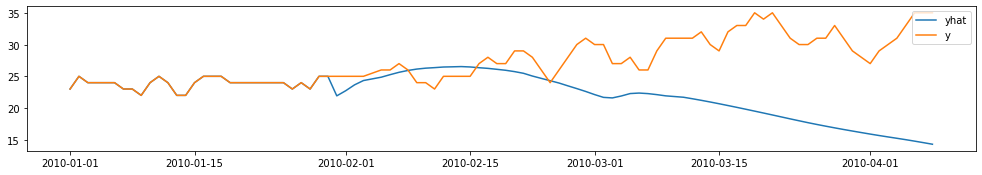

2 Relative humidity_avg(%)


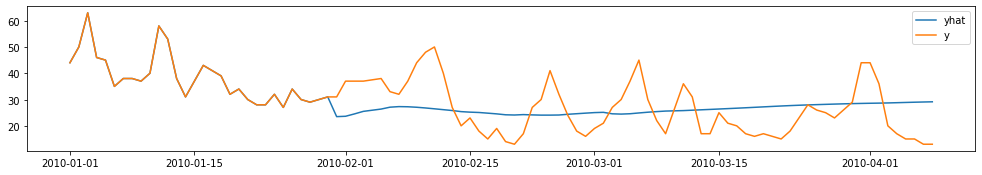

3 windspeedKmph_avg(Km/h)


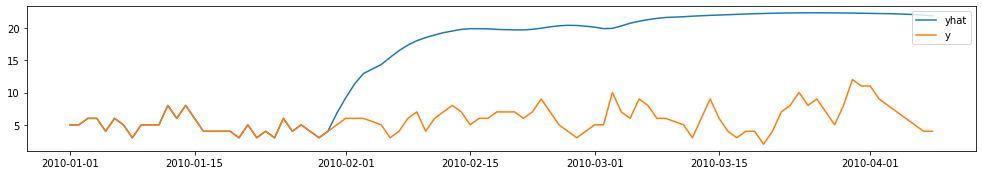

4 pressureMB_avg


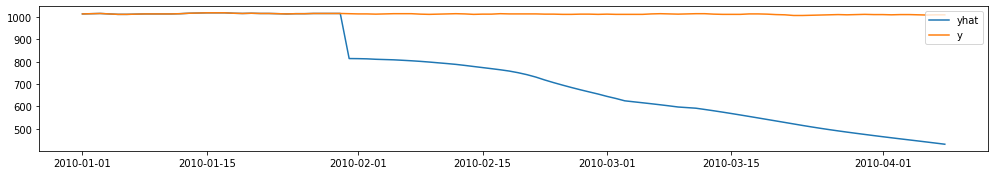

5 precipMM_avg(mm)


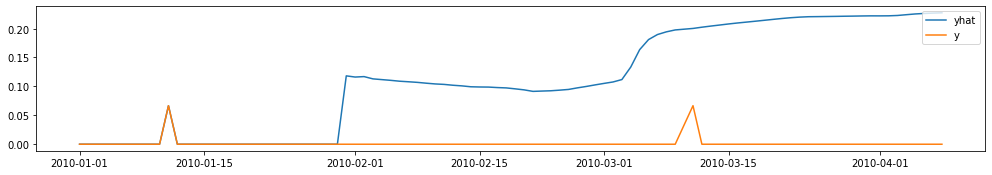

6 weatherDesc


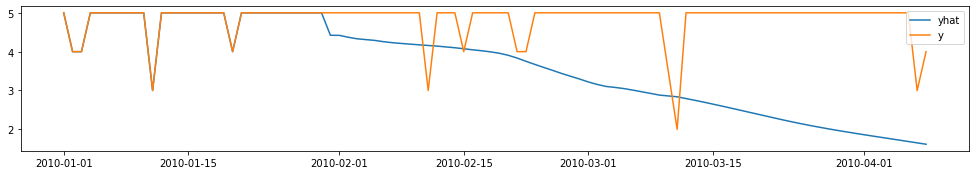

7 Sunshine Hours


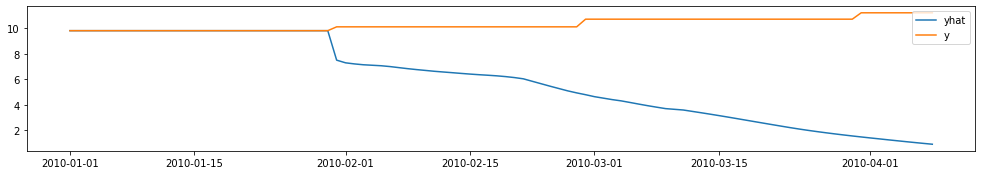

8 %_soil_moisure


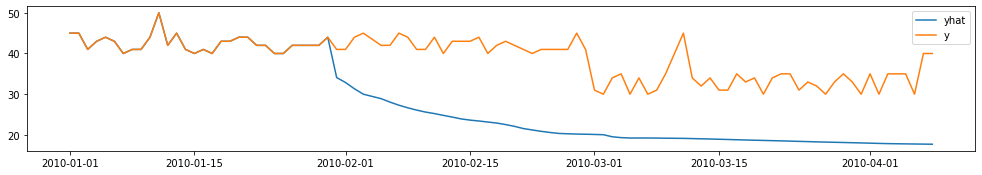

In [294]:
for i in range(len(dataset_input_df.columns)):
    print(i+1, dataset_input_df.columns[i])
    plt.figure(figsize=(17,25))
    
    
    plt.subplot(len(dataset_input_df.columns), 1, i+1)
    
    plt.plot(dataset_input_df[dataset_input_df.columns[i]], label='yhat') # , linestyle = 'dotted'
    plt.legend(loc="upper right")
    plt.plot(test_df[test_df.columns[i]], label='y') # , linestyle = 'dotted'
    plt.legend(loc="upper right")
    
    plt.show()


In [70]:
# for i in range(len(df1.columns)):
#     globals()["in_seq" + str(i+1)] = df1[df1.columns[i]]


# # choose a number of time steps
# n_steps = 3
# # convert into input/output
# X, y = split_sequences(df1, n_steps)
# print(X.shape, y.shape)
# # summarize the data
# for i in range(len(X)):
#     print(X[i], y[i])

In [ ]:
# from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
# import numpy as np
# def run_experiment(model):
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     print("R^2 : ", r2_score(y_test, y_pred))
#     print("MAE :", mean_absolute_error(y_test,y_pred))
#     print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

In [237]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import math

# mse = mean_squared_error(y, yhat)
# mse

# rmse = math.sqrt(mean_squared_error(y, yhat))
# rmse

# r2score = r2_score(y, yhat)
# r2score

# mae = mean_absolute_error(y, yhat)
# mae

# mean_squared_error(y, yhat, squared=False)